<a href="https://colab.research.google.com/github/Grassgod/Go_Practice/blob/master/Coursework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Mining - Social Media Analytics


### Authors
1. Darsh Jadhav (10806664)
2. Huajie He (10689523)
3. Jonathan Coutinho (9931026)
4. Nuhu Ibrahim (10723572)
5. Xinmiao Tang (10618359)
6. Yuqi Zhang (10613157)

## Research Topic
Tokyo Olympics

## Research Questions
1. What topics are discussed by people talking about Tokyo Olympics?
  **[Topic Modeling]**
2. What are the major sentiments around the Tokyo Olympics? 
  **[Sentiment Analysis]**
3. Have peoples’ opinions on the Tokyo Olympics changedover the period of COVID-19? 
  **[Sentiment Analysis]**
4. Are people scared that there will be a surge in COVID-19  cases in  relation to the 2020 Summer Olympics?
  **[Sentiment Analysis]**
5. What organizations, people, events, or places are the most discussed? **[Named Entity Recognition]**
6. Have people been discussing some sports while talking about Tokyo Olympics?
  **[Named Entity Recognition]**
7. If yes, which sports and can they be linked to a knowledge base(s)?
  **[Named Entity Linking]**  


## Preparation
### Library installation/import
Installing and importing libraries that are used in other sections of the pipeline.

In [ ]:
!pip install spacy==3.0
!pip install tweepy
!pip install wordcloud

# Topic modeling
!pip install gensim

# Topic visualization
!pip install pyldavis==3.2.2

# Setiment Analysis
!pip install vaderSentiment
!pip install textblob
!pip install text2emotion

# Named Entity Recognition
!pip install spacy-transformers
!python -m spacy download en_core_web_trf

# Named Entity Linker
!pip install spacy-entity-linker
!python -m spacyEntityLinker "download_knowledge_base"
!pip install emoji --upgrade

# Install google drive donwloader
!pip install gdown

# SnsScrape -- Helps scraping historical tweets
# Note: This will only work with python 3.8
!pip install git+https://github.com/JustAnotherArchivist/snscrape.git

In [ ]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import os
import gdown
import csv
import json

**Scrapping Twitter for data**
Tags used to get more information about Tokyo Olympics.

1. #TokyoOlympics
2. "Tokyo Olympics"
3. #Tokyo2020
4. #Tokyo2021

Tweepy was dropped for snscrape to enable us get access to historical tweets, i.e. tweets from long time ago on the Twitter platform.

**A: The steps below can be skipped (Go to B) -- Tweets in Step B have already been scrapped to reduce the time required to run these experiments**

**Convert json file to csv file and remove unused**


In [ ]:
# Convert json file to csv file and remove unused fileds to reduce redundant data.
def process_json_to_csv(jsonfilename, csvfilename):
  with open(csvfilename, 'w', encoding='utf-8') as dest_file:
      writer = csv.writer(dest_file)
      writer.writerow(['date','text'])
      with open(jsonfilename, 'r', encoding='utf-8') as source_file:
          for line in source_file:
              element = json.loads(line.strip())
              if 'url' in element:
                  del element['url']
              if 'renderedContent' in element:
                  del element['renderedContent']
              if 'id' in element:
                  del element['id']
              if 'userdg' in element:
                  del element['user']
              if 'outlinks' in element:
                  del element['outlinks']
              if 'tcooutlinks' in element:
                  del element['tcooutlinks']
              if 'retweetCount' in element:
                  del element['retweetCount']
              if 'quoteCount' in element:
                  del element['quoteCount']
              if 'replyCount' in element:
                  del element['replyCount']
              if 'likeCount' in element:
                  del element['likeCount']
              if 'conversationId' in element:
                  del element['conversationId']
              if 'source' in element:
                  del element['source']
              if 'sourceUrl' in element:
                  del element['sourceUrl']
              if 'sourceLabel' in element:
                  del element['sourceLabel']
              if 'media' in element:
                  del element['media']
              if 'retweetedTweet' in element:
                  del element['retweetedTweet']
              if 'quotedTweet' in element:
                  del element['quotedTweet']
              if 'mentionedUsers' in element:
                  del element['mentionedUsers']
              if element['lang'] != 'en':
                  pass
              else:
                  if 'lang' in element:
                      del element['lang']
                  writer.writerow(list(element.values()))

In [ ]:
since = "2019-10-01"
until = "2021-03-20"
query = "#TokyoOlympics"
# Using OS library to call CLI commands in Python
os.system("snscrape --jsonl --max-results 500000 --since "+ since + " twitter-search '"+ query + " until:" + until + "' > current_set-1.json")
process_json_to_csv("current_set-1.json", "current_set-1.csv")
tweets_df_1 = pd.read_csv("current_set-1.csv", quotechar='"', encoding='utf8')

32512

In [ ]:
since = "2019-10-01"
until = "2021-03-20"
query = "Tokyo Olympics" 
# Using OS library to call CLI commands in Python
os.system("snscrape --jsonl --max-results 500000 --since "+ since + " twitter-search '"+ query + " until:" + until + "' > current_set-2.json")
process_json_to_csv("current_set-2.json", "current_set-2.csv")
tweets_df_2 = pd.read_csv("current_set-2.csv", quotechar='"', encoding='utf8')

32512

In [ ]:
since = "2019-10-01"
until = "2021-03-20"
query = "#Tokyo2020"
# Using OS library to call CLI commands in Python
os.system("snscrape --jsonl --max-results 500000 --since "+ since + " twitter-search '"+ query + " until:" + until + "' > current_set-3.json")
process_json_to_csv("current_set-3.json", "current_set-3.csv")
tweets_df_3 = pd.read_csv("current_set-3.csv", quotechar='"', encoding='utf8')

32512

In [ ]:
since = "2019-10-01"
until = "2021-03-20"
query = "#Tokyo2021"
# Using OS library to call CLI commands in Python
os.system("snscrape --jsonl --max-results 500000 --since "+ since + " twitter-search '"+ query + " until:" + until + "' > current_set-4.json")
process_json_to_csv("current_set-4.json", "current_set-4.csv")
tweets_df_4 = pd.read_csv("current_set-4.csv", quotechar='"', encoding='utf8')

32512

**B: You should only run the cell below if you skipped A. The steps below can be skipped (Go to C) -- Tweets in Step C have already been preprocessed to reduce the time required to run these experiments**

In [ ]:
git_csv_1, csv_1 = "https://drive.google.com/uc?id=19e8f0LCktHeQ8o7lgcAkVTm_-OMHoO7g", "current_set-1.csv"
gdown.download(git_csv_1, csv_1, quiet=False) 
tweets_df_1 = pd.read_csv(csv_1, quotechar='"', encoding='utf8')

git_csv_2, csv_2 = "https://drive.google.com/uc?id=1V9CXyRvMFYiCpmtYITbp1iCc0rw5D5_t", "current_set-2.csv"
gdown.download(git_csv_2, csv_2, quiet=False) 
tweets_df_2 = pd.read_csv(csv_2, quotechar='"', encoding='utf8')

git_csv_3, csv_3 = "https://drive.google.com/uc?id=1EwD_QY3vvAvOVi0g6o252-J-0z4QAHny", "current_set-3.csv"
gdown.download(git_csv_3, csv_3, quiet=False) 
tweets_df_3 = pd.read_csv(csv_3, quotechar='"', encoding='utf8')

git_csv_4, csv_4 = "https://drive.google.com/uc?id=1dllf20JNSfA8q-DcDL1EyOQdI7YVTaHI", "current_set-4.csv"
gdown.download(git_csv_4, csv_4, quiet=False) 
tweets_df_4 = pd.read_csv(csv_4, quotechar='"', encoding='utf8')

In [ ]:
git_slang, slangs_path = "https://raw.githubusercontent.com/nuhu-ibrahim/CW2/main/slangs.txt", "slangs.txt"
open(slangs_path, 'wb').write(requests.get(git_slang, allow_redirects=True).content)

# Merging all csv files of tweets
tweets_df = pd.concat([tweets_df_1, tweets_df_2, tweets_df_3, tweets_df_4], ignore_index=True, sort=False)

## Data pre-processing

**Cleaning**<br>
Some of the methods we should thing about include:
1. Removing hashtags;
2. Removing usernames;
3. Removing duplicate tweets;
4. Removing URLS;
5. Removing names (we can get an online database of names and just remove those names);
6. Lemmatization;
7. Removing emojis or making sense of them;
8. Removing stop words (may be);
9. Replacing abbreviations with their full forms;
10. Remove HTML tags;
11. Standardize words (remove multiple letters);
12. Demojize emojis (fire replaces 🔥); and
13. Replace slangs.

In [ ]:
# Load the regular expression library
import re, itertools

# Load the emoji library
import emoji

import codecs
import numpy as np

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

stop_words = stopwords.words('english')

# We can add more stop words by putting them into the array below
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

# Function that performs tokenization
def sent_to_words(sentence):
  yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

# Function that removes stop words
def remove_stopwords(texts):
  words = []
  for doc in texts:
    for word in doc:
      if word not in stop_words:
        words.append(word)
  
  return " ".join(words)

# Function that lemmatize a text
def lemmatize_text(texts):
  wordnet_lemmatizer = WordNetLemmatizer()

  words = []
  for doc in texts:
    for word in doc:
      words.append(wordnet_lemmatizer.lemmatize(word))
  
  return " ".join(words)

# Load word full forms
def load_slangs(path):
    slangs           = list()
    slang_file   = codecs.open(path, 'r', encoding = 'utf-8')
    slang_lines  = slang_file.readlines()
    
    for line in slang_lines:
        line = re.sub("\n", '', line)
        short = line.split('=', 1)[0]
        full = line.split('=', 1)[1]

        slangs.append([short.lower(), full.lower()])
    slang_file.close()
    
    # full_forms: list
    return slangs

# function that replaces slangs
def replace_slangs(texts):
  slangs = np.array(load_slangs(slangs_path))
  words = []

  for doc in texts:
    for word in doc:
      if word in slangs[:,0]:
        index = np.where(slangs[:,0] == word)
        words.append(slangs[index][0][1])
      else:
        words.append(word)
  return " ".join(words)

In [ ]:
# Replace emojis to enable us make a better sentiment analysis
tweets_df['text_processed'] = tweets_df['text'].map(lambda x: emoji.demojize(x, delimiters=("", "")))

In [ ]:
# Replacing slangs with full forms to maintain consistency and remove anomalies
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: replace_slangs(sent_to_words(x)))

In [ ]:
# Remove punctuation
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub('[,\\.!?]', ' ', x))

In [ ]:
# Convert the titles to lowercase
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: x.lower())

In [ ]:
# Remove @ usernames to enforce anonymization of data
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub('(?:@[\w_]+)', '', x))

In [ ]:
# Remove # tags to reduce anomalies
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", '', x))

In [ ]:
# Remove URL to reduce anomalies
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r"http\S+.\S+", "",x))

In [ ]:
# Remove unnecessary line breaks
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub("\n|\r|\t|\n\r", ' ', x))

In [ ]:
# Remove contigious spaces to reduce anomalies
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub("\s+", ' ', x))

In [ ]:
# Remove trailing spaces to reduce anomalies
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: x.strip())

In [ ]:
# Remove HTML tags
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub('<[^<]+?>', ' ', x))

In [ ]:
# Standardize words (remove multiple letters) to reduce the popular social media misspellings, e.g. loveeee for love
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: ''.join(''.join(s)[:2] for _, s in itertools.groupby(x)))

In [ ]:
# remove stop words
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: remove_stopwords(sent_to_words(x)))

In [ ]:
# Lemmatization to reduce anomalies
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: lemmatize_text(sent_to_words(x)))

**C: You should only run the cell below if you skipped B**

In [ ]:
# You can load pre-processed data from here.
git_processed_csv, processed_csv = "https://drive.google.com/uc?id=18LjL_u-g4VuvVJOOwQE1sVL7yCan6TAd", "processed_set.csv"
gdown.download(git_processed_csv, processed_csv, quiet=False) 

tweets_df = pd.read_csv(processed_csv, quotechar='"', encoding='latin-1')

In [ ]:
# Process the time zone
tweets_df['date'] = pd.to_datetime(tweets_df['date']).apply(lambda x: x.replace(tzinfo=None))

In [ ]:
# Split the data by time
def split_by_time(dataset, year, month, day):
    dataset_after = dataset[pd.to_datetime(dataset['date']) > pd.Timestamp(year, month, day)]
    dataset_before = dataset[pd.to_datetime(dataset['date']) <= pd.Timestamp(year, month, day)]
    return dataset_before, dataset_after

In [ ]:
# Split data into 3 parts (from October 2019 to March 2020, from April 2020 to September 2020, from October 2020 to March 2021)
tweets_df_from_oct19_to_mar20, tweets_df_after = split_by_time(tweets_df, 2020, 3, 31)
tweets_df_from_apr20_to_sep20, tweets_df_from_oct20_to_mar21 = split_by_time(tweets_df_after, 2020, 9, 30)

In [ ]:
# Removing duplicate tweets
unique_tweets = tweets_df['text_processed'].drop_duplicates()
unique_tweets_from_oct19_to_mar20 = tweets_df_from_oct19_to_mar20['text_processed'].drop_duplicates()
unique_tweets_from_apr20_to_sep20 = tweets_df_from_apr20_to_sep20['text_processed'].drop_duplicates()
unique_tweets_from_oct20_to_mar21 = tweets_df_from_oct20_to_mar21['text_processed'].drop_duplicates()

In [ ]:
# In this stage, we are picking random sample of tweets because of unavailabily of enough time and computing resources
# Randomly sample
np.random.seed(1)

# Set tweets set for topic modelling
tm_unique_tweets_random = unique_tweets.sample(n=10000)

unique_tweets_random = unique_tweets.sample(n=10000)
unique_tweets_from_oct19_to_mar20_random = tweets_df_from_oct19_to_mar20.sample(n=10000)
unique_tweets_from_apr20_to_sep20_random = tweets_df_from_apr20_to_sep20.sample(n=10000)
unique_tweets_from_oct20_to_mar21_random = tweets_df_from_oct20_to_mar21.sample(n=10000)

**Visualization using word cloud**<br>
Generating a word cloud to check whether our data needs any further cleaning.

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

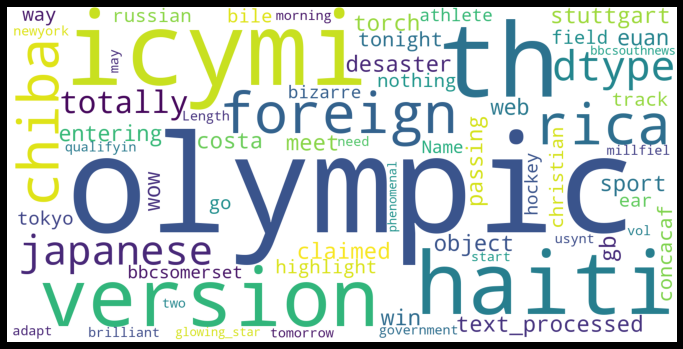

In [ ]:
# join the words of the different tweets together into one string
long_string = ''.join(str(unique_tweets))
new_long_string = ' '.join(set(long_string.split(" ")))

# create a WordCloud object
wordcloud = WordCloud(width=1600, height=800, background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# generate a word cloud
wordcloud.generate(new_long_string)

# visualize the word cloud
wordcloud.to_image()

# Save as high-res image
plt.figure(figsize=(12,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')

## Topic Modelling

### Research Question 1
What topics are discussed by people talking about Tokyo Olympics?

In [ ]:
import os
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import gensim
from gensim.corpora import Dictionary
from pprint import pprint

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [ ]:
def sentences_to_words(sentences):
  for sentence in sentences:
    yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

# data = tweets_df.text_processed.values.tolist()
data = tm_unique_tweets_random.tolist()

data_words = list(sentences_to_words(data))

# create a dictionary
id2word = gensim.corpora.Dictionary(data_words)

# Filter out words that are too frequent
id2word.filter_n_most_frequent(300)

# create a corpus
texts = data_words

# convert the corpus into a BoW representation
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
import numpy as np
def show_example_tweets_relate_topics(model, search_topic, maxium_show_num):
  print()
  print(f"Shown below are tweets related to topic", (search_topic + 1))
  print("Topic distribution:")
  print(model.print_topic(search_topic))
  print()
  k = 0
  result = []
  possible = []
  for i in range(len(data)):
    if k>=maxium_show_num:
      break
    test_doc=data[i].split()
    doc_bow = id2word.doc2bow(test_doc)
    doc = model[doc_bow]
    max = 0
    max_index = -1
    for j in doc:
      if j[1]>max:
        max = j[1]
        max_index = j[0]
    if max_index == search_topic:
      result.append(data[i])
      possible.append(max)

  index = np.argsort(-np.array(possible))

  print(result)
  for i in range(maxium_show_num):
    
    if index.size != 0:
      print('-------------------')
      print(result[index[i]])

In [ ]:

# set number of topics
num_topics = 50


# build an LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)

# print keywords in each topic
print(lda_model.print_topics())
# doc_lda = lda_model[corpus]

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

[(40, '0.008*"abc" + 0.007*"italy" + 0.006*"london" + 0.006*"zi" + 0.006*"statement" + 0.006*"ho" + 0.005*"offer" + 0.005*"rearranged" + 0.004*"raise" + 0.004*"setting"'), (13, '0.013*"gt" + 0.011*"wrestling" + 0.006*"british" + 0.006*"complete" + 0.005*"trying" + 0.005*"measure" + 0.004*"scrapped" + 0.004*"leader" + 0.004*"coates" + 0.004*"nigeria"'), (15, '0.008*"dick" + 0.008*"pound" + 0.006*"row" + 0.005*"thinking_face" + 0.005*"bbc" + 0.005*"safety" + 0.005*"sports_medal" + 0.004*"forced" + 0.004*"bk" + 0.004*"try"'), (29, '0.008*"money" + 0.006*"fencer" + 0.006*"found" + 0.005*"devi" + 0.005*"bhavani" + 0.005*"representing" + 0.005*"probably" + 0.005*"interview" + 0.004*"koike" + 0.004*"soon"'), (35, '0.013*"gt" + 0.013*"aug" + 0.012*"distraction" + 0.012*"laolympics" + 0.012*"rushing" + 0.012*"globalfocus" + 0.012*"parisolympics" + 0.010*"podcast" + 0.008*"covidvaccine" + 0.008*"nbcsports"'), (5, '0.009*"announces" + 0.007*"reach" + 0.006*"half" + 0.005*"tennis" + 0.004*"impress

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
# Show some examples related to topic, here is the original text of tweets for easy understanding
for i in range(10):
  show_example_tweets_relate_topics(lda_model,i,10)


Shown below are tweets related to topic 1
Topic distribution:
0.007*"qatar" + 0.006*"nbcolympics" + 0.005*"care" + 0.005*"kimono" + 0.004*"window" + 0.004*"earlier" + 0.004*"para" + 0.004*"boxer" + 0.004*"yuriko" + 0.004*"koike"

['tokyo olympics take place summer', 'katie ledecky give glimpse tokyo olympic game schedule uhmtirmls', 'tokyo olympics begin july lqepk pi', 'gerard butler located greece one carry olympic flame sparta good luck olympicteams good luck greece good luck tokyo bjr vswabf', 'contingency plan charlesworth possibility postponement tokyo game riccharlesworth manpreetpawar thehockeyindia indianolympians kirenrijiju indiasports tokyoolympics sportsnews cqiahxgh', 'canada men field hockey olympic qualifier one insane dramatic sporting finish seen long time fieldhockeycan pulled insane congrats heading tokyo', 'tazogumball miraitowa profile pic tokyo olympic mascot', 'month world come together tokyoolympics nbcolympics mieykurm', 'amelieintokyo olympics jesus christ j

In [ ]:
from gensim.models import LsiModel

# set number of topics
num_topics = 50

lsi_model = LsiModel(corpus, id2word=id2word, num_topics=num_topics)
topics = lsi_model.print_topics()
for topic in topics:
  print(topic)
doc_lsi = lsi_model[corpus]  # vectorize input copus in BoW format

(0, '0.672*"equality" + 0.433*"act" + 0.426*"lgbt" + 0.215*"generation" + 0.213*"marking" + 0.204*"momentum" + 0.203*"grown" + 0.031*"gender" + 0.012*"co" + 0.011*"ek"')
(1, '0.381*"rushing" + 0.380*"parisolympics" + 0.380*"laolympics" + 0.380*"distraction" + 0.371*"globalfocus" + 0.317*"covidvaccine" + 0.303*"hello" + 0.294*"nbcsports" + 0.023*"nbcnews" + 0.011*"nbcolympics"')
(2, '0.320*"fitness" + 0.290*"athleisure" + 0.247*"activewear" + 0.226*"tracknation" + 0.226*"trackandfield" + 0.217*"shoe" + 0.210*"fitnessaddict" + 0.204*"workout" + 0.200*"christmas" + 0.197*"kotd"')
(3, '0.387*"sumitomo" + 0.238*"local" + 0.236*"project" + 0.231*"tell" + 0.222*"action" + 0.217*"stand" + 0.213*"community" + 0.211*"massive" + 0.208*"vietnam" + 0.206*"protect"')
(4, '-0.490*"sony" + -0.434*"sne" + -0.267*"rkuny" + -0.263*"closer" + -0.244*"rakuten" + -0.196*"aapl" + -0.189*"nikkei" + -0.179*"market" + -0.153*"amzn" + -0.150*"apple"')
(5, '-0.644*"keycap_" + -0.304*"gt" + -0.130*"st_place_medal"

In [ ]:
# Show some examples related to topic, here is the original text of tweets for easy understanding
for i in range(num_topics):
  show_example_tweets_relate_topics(lsi_model, i, 5)


Shown below are tweets related to topic 1
Topic distribution:
0.672*"equality" + 0.433*"act" + 0.426*"lgbt" + 0.215*"generation" + 0.213*"marking" + 0.204*"momentum" + 0.203*"grown" + 0.031*"gender" + 0.012*"co" + 0.011*"ek"

['plus fema infowars camp bad vibe weare af generation llc vibe amp cool olympics tokyo amp japan got entire navy back help hahahaa think gave back navy finally bait navy nope new sink kz fb', 'seriously sound like kamikaze suicidal act middle cv nationwide attack japan tokyo governor see circumstance cancelling olympics ekx ykgwz', 'reuterssports new tokyo olympics head seiko hashimoto naomi osaka others call sexual harassment also must go ioc must condemn crime using debacle trumpet crazy gender equality record vic gold medalist olympics daisuke takahashi dwzgvp mx', 'design tokyo victory ceremony podium unveiled later date given school game keep legacy alive among young generation tokyo podium alqtan', 'japan demand tokyo olympics postponed one year kfnb li zw

**Topics Visualization**

In [ ]:
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./'+str(num_topics))

LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
with open(LDAvis_data_filepath, 'wb') as f:
  pickle.dump(LDAvis_prepared, f)

with open(LDAvis_data_filepath, 'rb') as f:
  LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './'+ str(num_topics) +'.html')

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
2      0.012832 -0.161776       1        1  2.451698
1     -0.052919  0.085423       2        1  2.375114
45     0.074219 -0.031753       3        1  2.350254
19    -0.010839  0.022876       4        1  2.281650
25     0.023808 -0.017692       5        1  2.243369
20     0.194813  0.082861       6        1  2.188556
22     0.039509  0.025209       7        1  2.186168
46    -0.045017  0.018612       8        1  2.167746
12     0.004158 -0.036617       9        1  2.153268
39    -0.119402 -0.089155      10        1  2.137750
42    -0.017505  0.030651      11        1  2.079880
9     -0.013049  0.051688      12        1  2.077864
27     0.067071  0.035667      13        1  2.062288
49    -0.011697  0.026651      14        1  2.058748
47     0.031490  0.072386      15        1  2.057312
37     0.031296  0.011794      16        1  2.048945
41     0.029917 -0.016353      17        1  2.044752
35     0.030565  0.002402      18        1  2.028247
7     -0.023025  0.035006      19        1  2.019901
8      0.008518 -0.013605      20        1  2.015939
31    -0.036331 -0.003386      21        1  2.005578
30     0.111820 -0.133902      22        1  1.994918
24     0.042786 -0.043395      23        1  1.994107
5     -0.069131 -0.022141      24        1  1.989624
32     0.020413  0.001511      25        1  1.974248
44    -0.025721  0.059272      26        1  1.971349
6     -0.012566  0.034478      27        1  1.970319
40    -0.010556  0.026564      28        1  1.969654
18     0.052657 -0.042022      29        1  1.959493
11    -0.059561  0.006586      30        1  1.959222
10    -0.014126  0.046706      31        1  1.945053
23    -0.016281  0.026175      32        1  1.934320
16    -0.007938  0.014857      33        1  1.924291
13    -0.033296  0.039462      34        1  1.924159
0      0.013880 -0.010435      35        1  1.916785
43    -0.001147 -0.003341      36        1  1.912582
48    -0.007171 -0.035385      37        1  1.911002
4     -0.026971 -0.063980      38        1  1.903172
15     0.013014  0.017563      39        1  1.878168
29    -0.043012  0.005580      40        1  1.876066
33     0.022212  0.006030      41        1  1.872746
34    -0.002558 -0.033797      42        1  1.866300
36     0.009080 -0.053147      43        1  1.851588
38     0.011505  0.045780      44        1  1.843846
28    -0.105023 -0.010350      45        1  1.839852
26    -0.011971  0.047061      46        1  1.799819
3     -0.044037 -0.006749      47        1  1.778762
14    -0.010417 -0.084370      48        1  1.769186
21    -0.019401  0.033156      49        1  1.740601
17     0.005106  0.001343      50        1  1.693744, topic_info=          Term       Freq      Total Category  logprob  loglift
3939  equality  71.000000  71.000000  Default  30.0000  30.0000
1470        gt  57.000000  57.000000  Default  29.0000  29.0000
6390      lgbt  39.000000  39.000000  Default  28.0000  28.0000
3237       act  43.000000  43.000000  Default  27.0000  27.0000
913       ring  51.000000  51.000000  Default  26.0000  26.0000
...        ...        ...        ...      ...      ...      ...
7553       rwc   4.386261  18.012430  Topic50  -5.7682   2.6656
1808      polo   4.273548  16.425930  Topic50  -5.7942   2.7318
2766   surfing   4.597614  29.299397  Topic50  -5.7211   2.2262
944     sunday   4.354814  23.874880  Topic50  -5.7754   2.3767
5466       etc   4.241184  19.546701  Topic50  -5.8018   2.5503

[3287 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
2921       5  0.085348    a_
2921      14  0.170697    a_
2921      16  0.085348    a_
2921      17  0.426741    a_
2921      19  0.170697    a_
...      ...       ...   ...
26843     42  0.869276  zywk
2864      22  0.696088    zz
2864      47  0.232029    zz
9556       8  0.718337   æ__
28861      8  0.811586   æ_æ

[11661 rows x 3 c

## Sentiment Analysis
Based on the lexicon- and rule-based VADER sentiment analysis tool.

### Research Questions 2 & 3
1. What are the major sentiments around the Tokyo Olympics?
2. Have peoples' opinion changed over the time?

In [ ]:
# Import SentimentIntensityAnalyzer to implement sentiment analysis including negative, positive, neutral and compound
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# Import TextBlob to get polarity and subjectivity score.
from textblob import TextBlob
# Import text2emotion to detect emotions including happy, angry, sad, surprise and fear.
import text2emotion as te

In [ ]:
# Implement sentiment analysis
def sentiment_analysis(dataset):
    # tweets_sentiment = dataset.to_frame()
    tweets_sentiment = dataset
    for index, text in tweets_sentiment.text_processed.iteritems():
        score = SentimentIntensityAnalyzer().polarity_scores(str(text))
        emotion = te.get_emotion(str(text))

        # Get sentiments of text.
        neg = score['neg']
        neu = score['neu']
        pos = score['pos']
        comp = score['compound']

        # The 'sentiment' filed will save the main sentiment for each text.
        if neg > pos:
            tweets_sentiment.loc[index, 'sentiment'] = 'negative'
        elif pos > neg:
            tweets_sentiment.loc[index, 'sentiment'] = 'positive'
        else:
            tweets_sentiment.loc[index, 'sentiment'] = 'neutral'
        
        # Get emotions of text.
        angry = emotion.get('Angry')
        fear = emotion.get('Fear')
        happy = emotion.get('Happy')
        sad = emotion.get('Sad')
        surprise = emotion.get('Surprise')
        
        # Sort emotions by their scores in descending order.
        sorted_emotion = sorted(emotion.items(), key = lambda x:x[1], reverse=True)
        # Store the main emotion into 'emotion' field.
        tweets_sentiment.loc[index, 'emotion'] = sorted_emotion[0][0]

        # Save sentiments and emotions for each tweet.
        tweets_sentiment.loc[index, 'neg'] = neg
        tweets_sentiment.loc[index, 'neu'] = neu
        tweets_sentiment.loc[index, 'pos'] = pos
        tweets_sentiment.loc[index, 'compound'] = comp
        tweets_sentiment.loc[index, 'angry'] = angry
        tweets_sentiment.loc[index, 'fear'] = fear
        tweets_sentiment.loc[index, 'happy'] = happy
        tweets_sentiment.loc[index, 'sad'] = sad
        tweets_sentiment.loc[index, 'surprise'] = surprise
        
        # Calculate polartiy and subjectivty scores of text.
        analysis = TextBlob(str(text))
        tweets_sentiment.loc[index, 'polarity'] = analysis.sentiment.polarity
        tweets_sentiment.loc[index, 'subjectivity'] = analysis.sentiment.subjectivity
        
        print("The " + str(index) + " rows finished.")
    # tweets_sentiment: DataFrame
    return tweets_sentiment

In [ ]:
# Get the result of sentiment analysis of first period (from October 2019 to March 2020)
tweets_sentiment_from_oct19_to_mar20 = sentiment_analysis(unique_tweets_from_oct19_to_mar20_random)

In [ ]:
# Get the result of sentiment analysis of second period (from April 2020 to September 2020)
tweets_sentiment_from_apr20_to_sep20 = sentiment_analysis(unique_tweets_from_apr20_to_sep20_random)

In [ ]:
# Get the result of sentiment analysis of last period (from October 2020 to March 2021)
tweets_sentiment_from_oct20_to_mar21 = sentiment_analysis(unique_tweets_from_oct20_to_mar21_random)

In [ ]:
# Return the total number of tweets for each categories.
def get_sentiment(data_sentiment):
    tweets_negative = data_sentiment[data_sentiment["sentiment"] == 'negative']
    tweets_positive = data_sentiment[data_sentiment["sentiment"] == 'positive']
    tweets_neutral = data_sentiment[data_sentiment["sentiment"] == 'neutral']
    # tweets_negative: int
    # tweets_positive: int
    # tweets_neutral: int
    return tweets_negative, tweets_positive, tweets_neutral

In [ ]:
# Get amount of different categories for each period.
tweets_negative_from_oct19_to_mar20, tweets_positive_from_oct19_to_mar20, tweets_neutral_from_oct19_to_mar20 = get_sentiment(tweets_sentiment_from_oct19_to_mar20)
tweets_negative_from_apr20_to_sep20, tweets_positive_from_apr20_to_sep20, tweets_neutral_from_apr20_to_sep20 = get_sentiment(tweets_sentiment_from_apr20_to_sep20)
tweets_negative_from_oct20_to_mar21, tweets_positive_from_oct20_to_mar21, tweets_neutral_from_oct20_to_mar21 = get_sentiment(tweets_sentiment_from_oct20_to_mar21)

In [ ]:
# Return the proportion of  specific filed such as sentiment and emotion. 
def count_values_in_column(data, feature):
    total = data.loc[:, feature].value_counts(dropna=False)
    percentage = round(data.loc[:, feature].value_counts(dropna=False, normalize=True)*100, 2)
    # DataFrame
    return pd.concat([total, percentage], axis=1, keys=['Total', 'Percentage'])

In [ ]:
# Plot the pie chart for specific filed.
def plot_sentiment(data_sentiment, feature):
    sentiment_percentage = count_values_in_column(data_sentiment, feature)
    length = len(sentiment_percentage)
    names = sentiment_percentage.index
    size = sentiment_percentage['Percentage']
    explode = [0.2] * length

    plt.figure(figsize=(3, 3))
    cmap = plt.get_cmap("tab20c")
    outer_colors = cmap(np.arange(length)*4)
    # Create a blank cicle with given radius
    circle = plt.Circle((0, 0), 0.9, color='white')
    plt.pie(size, labels=names, colors=outer_colors, autopct="%1.2f%%",explode=explode, radius=3, shadow=True)
    p = plt.gcf()
    # Add the cirle to pie chart
    p.gca().add_artist(circle)
    plt.show()

**Proportion of emotions for the first period (from October 2019 to March 2020).**

          Total  Percentage
Happy      3864       38.64
Fear       2706       27.06
Surprise   2028       20.28
Sad         975        9.75
Angry       427        4.27


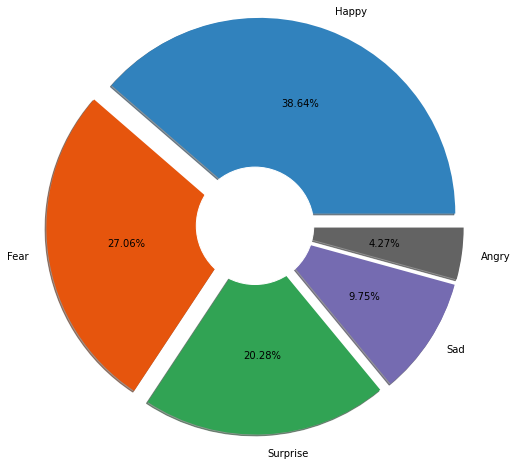

In [ ]:
# Output the proportion of emotions and plot the pie chart for first period (from October 2019 to March 2020).
print(count_values_in_column(tweets_sentiment_from_oct19_to_mar20, 'emotion'))
plot_sentiment(tweets_sentiment_from_oct19_to_mar20, 'emotion')

**Proportion of emotions for the second period (from April 2020 to September 2020).**

          Total  Percentage
Happy      3087       30.87
Fear       2992       29.92
Surprise   2351       23.51
Sad        1083       10.83
Angry       487        4.87


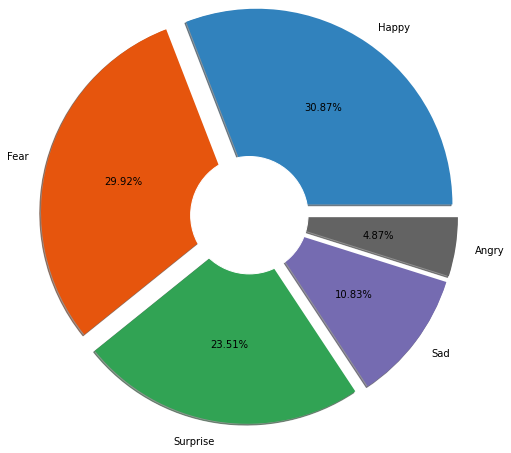

In [ ]:
# Output the proportion of emotions and plot the pie chart for second period (from April 2020 to September 2020).
print(count_values_in_column(tweets_sentiment_from_apr20_to_sep20, 'emotion'))
plot_sentiment(tweets_sentiment_from_apr20_to_sep20, 'emotion')

**Proportion of emotions for the last period (from October 2020 to March 2021).**

          Total  Percentage
Happy      3130       31.30
Fear       2565       25.65
Surprise   2293       22.93
Sad        1641       16.41
Angry       371        3.71


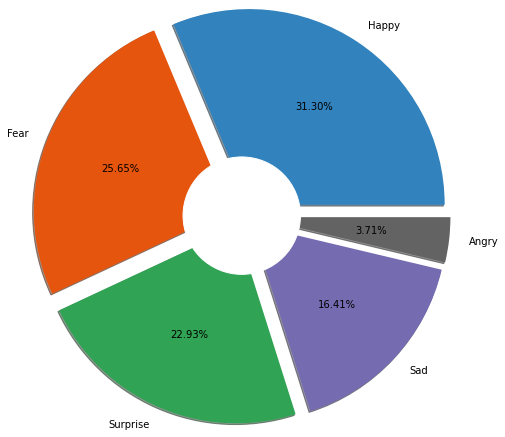

In [ ]:
# Output the proportion of emotions and plot the pie chart for last period (from October 2020 to March 2021).
print(count_values_in_column(tweets_sentiment_from_oct20_to_mar21, 'emotion'))
plot_sentiment(tweets_sentiment_from_oct20_to_mar21, 'emotion')

**Proportion of sentiments for the first period (from October 2019 to March 2020).**

          Total  Percentage
positive   4686       46.86
neutral    2825       28.25
negative   2489       24.89


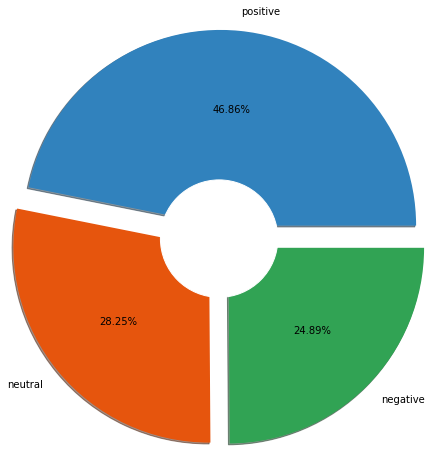

In [ ]:
# Output the proportion of sentiments and plot the pie chart for first period (from October 2019 to March 2020).
print(count_values_in_column(tweets_sentiment_from_oct19_to_mar20, 'sentiment'))
plot_sentiment(tweets_sentiment_from_oct19_to_mar20, 'sentiment')

**Proportion of sentiments for the second period (from April 2020 to September 2020).**

          Total  Percentage
positive   4513       45.13
neutral    3047       30.47
negative   2440       24.40


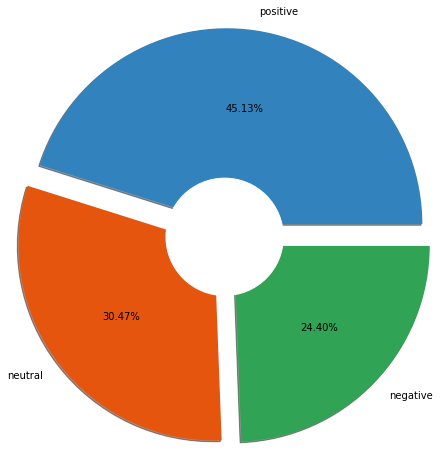

In [ ]:
# Output the proportion of sentiments and plot the pie chart for second period (from April 2020 to September 2020).
print(count_values_in_column(tweets_sentiment_from_apr20_to_sep20, 'sentiment'))
plot_sentiment(tweets_sentiment_from_apr20_to_sep20, 'sentiment')

**Proportion of sentiments for the last period (from October 2020 to March 2021).**

          Total  Percentage
positive   4606       46.06
neutral    2803       28.03
negative   2591       25.91


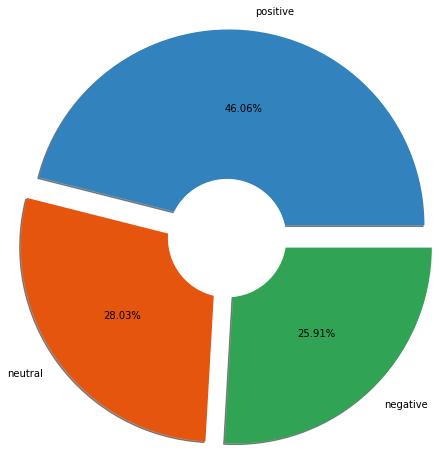

In [ ]:
# Output the proportion of sentiments and plot the pie chart for last period (from October 2020 to March 2021).
print(count_values_in_column(tweets_sentiment_from_oct20_to_mar21, 'sentiment'))
plot_sentiment(tweets_sentiment_from_oct20_to_mar21, 'sentiment')

### Research Question 4
Are people scared that there will be a surge in the COVID-19 cases?

In [ ]:
# Returns a sub-DataFrame of those rows whose name column match some words
def search(df, *words):
    dataset = df.copy()
    return dataset[np.logical_or.reduce([dataset['text'].str.contains(word) for word in words])]

In [ ]:
# Get tweets related to COVID-19.
tweets_containing_covid = search(tweets_df, 'COVID', 'corona virus', 'COVID19', '#COVID-19', "corona", "pandemic", "rona", "#COVID19", "Coronavirus", "virus")
tweets_containing_covid['text_processed'] = tweets_containing_covid['text'].drop_duplicates()

In [ ]:
# Randomly sample 1k tweets in order to decrease the time of running code.
tweets_containing_covid_sentiment = sentiment_analysis(tweets_containing_covid.sample(n=1000))
# Get amount of different categories.
tweets_negative_containing_covid, tweets_positive_containing_covid, tweets_neutral_containing_covid = get_sentiment(tweets_containing_covid_sentiment)

**Proportion of emotions in tweets containing texts that strongly suggests the pandemic is being discussed.**

          Total  Percentage
Happy       317        31.7
Fear        300        30.0
Surprise    232        23.2
Sad          98         9.8
Angry        53         5.3


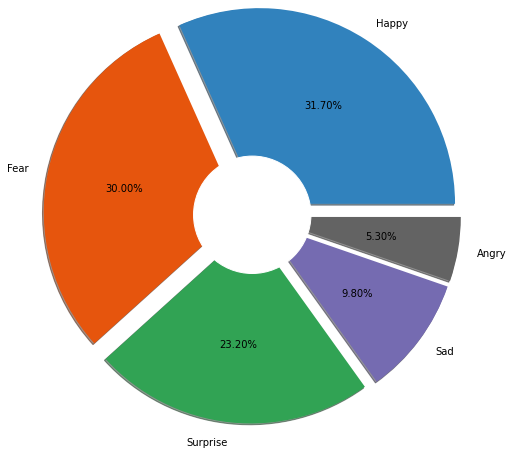

In [ ]:
# Output the proportion of emotions and plot the pie chart.
print(count_values_in_column(tweets_containing_covid_sentiment, 'emotion'))
plot_sentiment(tweets_containing_covid_sentiment, 'emotion')

**Proportion of sentiments in tweets containing texts that strongly suggests the pandemic is being discussed.**

          Total  Percentage
negative    433        43.3
positive    293        29.3
neutral     274        27.4


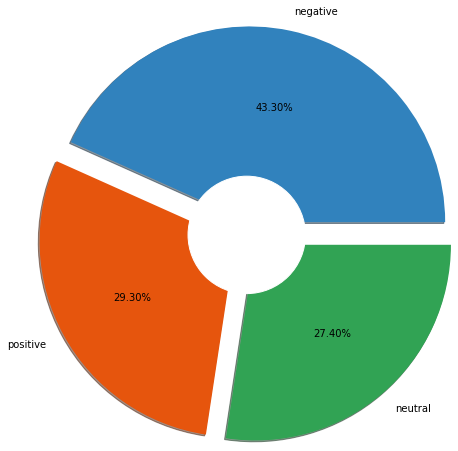

In [ ]:
# Output the proportion of sentiments and plot the pie chart.
print(count_values_in_column(tweets_containing_covid_sentiment, 'sentiment'))
plot_sentiment(tweets_containing_covid_sentiment, 'sentiment')

## Named Entity Recognition
Based on spaCy's model using contextualised embeddings.

### Research Question 5
What organizations, people, events, or places are the most discussed?

In [ ]:
import spacy
import en_core_web_trf
from collections import Counter

# Load the english transformer pipeline.
nlp = spacy.load('en_core_web_trf')

In [ ]:
# Save different kinds of named entities.
PERSON_data = []
GPE_data = []
ORDINAL_data = []
DATE_data = []
CARDINAL_data = []
TIME_data = []
NORP_data = []
EVENT_data = []
ORG_data = []
QUANTITY_data = []
LANGUAGE_data = []
PRODUCT_data = []
LOC_data = []
WORK_OF_ART_data = []
MONEY_data = []
FAC_data = []


for tweet_text in unique_tweets_random:
  # Process text by pre-trained pipeline.
  doc = nlp(tweet_text)
  # spacy.displacy.serve(doc, style='ent')
  for ne in doc.ents:
    # Return named entities.
    if ne.label_ == 'ORDINAL':
      ORDINAL_data.append(tweet_text[ne.start_char:ne.end_char])
    elif ne.label_ == 'NORP':
      NORP_data.append(tweet_text[ne.start_char:ne.end_char])
    elif ne.label_ == 'DATE':
      DATE_data.append(tweet_text[ne.start_char:ne.end_char])
    elif ne.label_ == 'GPE':
      GPE_data.append(tweet_text[ne.start_char:ne.end_char])
    elif ne.label_ == 'PERSON':
      PERSON_data.append(tweet_text[ne.start_char:ne.end_char])
    elif ne.label_ == 'CARDINAL':
      CARDINAL_data.append(tweet_text[ne.start_char:ne.end_char])
    elif ne.label_ == 'EVENT':
      EVENT_data.append(tweet_text[ne.start_char:ne.end_char])
    elif ne.label_ == 'ORG':
      ORG_data.append(tweet_text[ne.start_char:ne.end_char])
    elif ne.label_ == 'TIME':
      TIME_data.append(tweet_text[ne.start_char:ne.end_char])
    elif ne.label_ == 'LANGUAGE':
      LANGUAGE_data.append(tweet_text[ne.start_char:ne.end_char])
    elif ne.label_ == 'PRODUCT':
      PRODUCT_data.append(tweet_text[ne.start_char:ne.end_char])
    elif ne.label_ == 'LOC':
      LOC_data.append(tweet_text[ne.start_char:ne.end_char])
    elif ne.label_ == 'WORK_OF_ART':
      WORK_OF_ART_data.append(tweet_text[ne.start_char:ne.end_char])
    elif ne.label_ == 'QUANTITY':
      QUANTITY_data.append(tweet_text[ne.start_char:ne.end_char])
    elif ne.label_ == 'MONEY':
      MONEY_data.append(tweet_text[ne.start_char:ne.end_char])
    else:
      FAC_data.append(tweet_text[ne.start_char:ne.end_char])
    
  
# Calculate the frequency for each word from different categories.
PERSON_data = Counter(PERSON_data)
GPE_data = Counter(GPE_data)
ORDINAL_data = Counter(ORDINAL_data)
DATE_data = Counter(DATE_data)
CARDINAL_data = Counter(CARDINAL_data)
TIME_data = Counter(TIME_data)
NORP_data = Counter(NORP_data)
EVENT_data = Counter(EVENT_data)
ORG_data = Counter(ORG_data)
QUANTITY_data = Counter(QUANTITY_data)
LANGUAGE_data = Counter(LANGUAGE_data)
PRODUCT_data = Counter(PRODUCT_data)
LOC_data = Counter(LOC_data)
WORK_OF_ART_data = Counter(WORK_OF_ART_data)
MONEY_data = Counter(MONEY_data)
FAC_data = Counter(FAC_data)

In [ ]:
# Plot the bar chart to show the frequency of words.
def plot_bar_chart(dataset, common=5):
    plt.figure(figsize=(15, 5))
    entities = [f[0] for f in dataset.most_common(common)]
    frequency = [f[1] for f in dataset.most_common(common)]
    x_pos = [i for i, _ in enumerate(entities)]

    plt.bar(x_pos, frequency)
    plt.xlabel("Entity")
    plt.ylabel("Frequency")
    plt.title("The " + str(common) + " highest frequency")

    plt.xticks(x_pos, entities)
    plt.show()

**Proportion of the most discussed persons.**

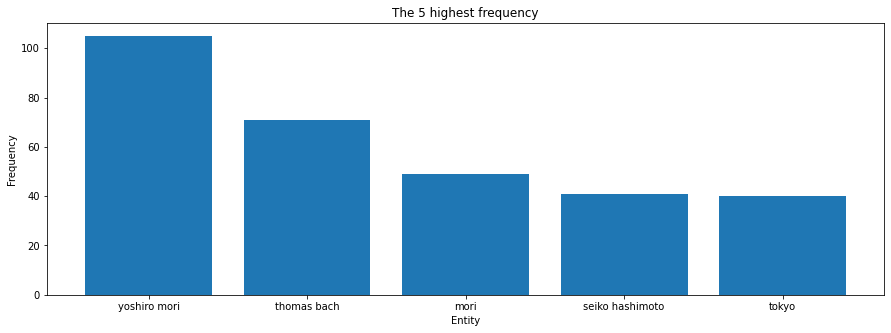

In [ ]:
# Plot the bar chart of PERSON type.
plot_bar_chart(PERSON_data)

**Proportion of the most discussed geopolitical entities.**

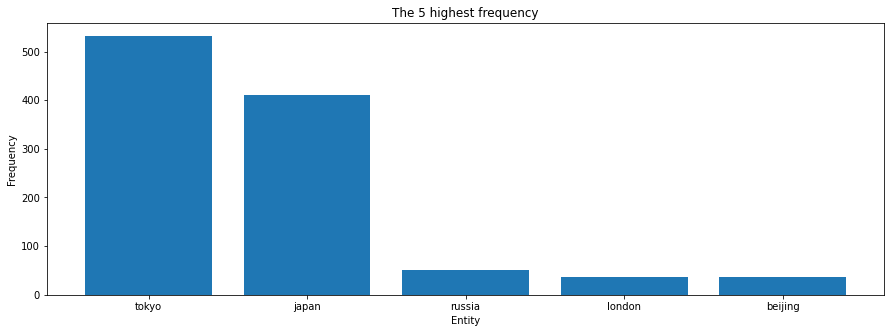

In [ ]:
# Plot the bar chart of GPE (Countries, Cities, and States) type.
plot_bar_chart(GPE_data)

**Proportion of the most discussed nationalities, religious or political groups.**

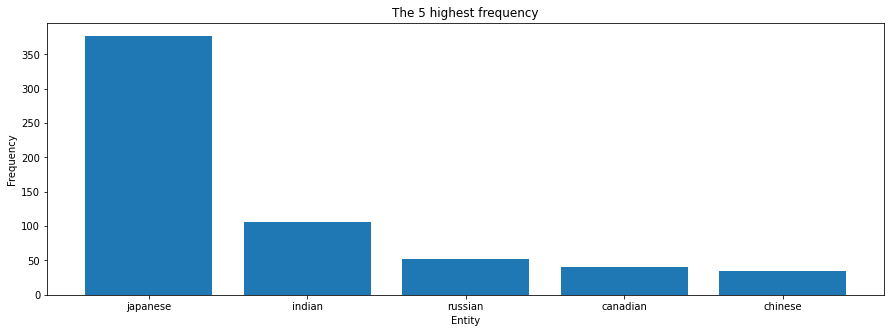

In [ ]:
# Plot the bar chart of NORP (Nationalities or religious or political groups) type.
plot_bar_chart(NORP_data)

**Proportion of the most discussed events.**

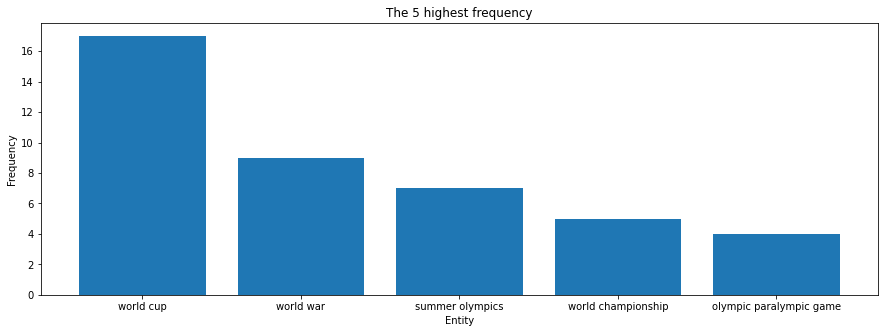

In [ ]:
# Remove the words which are common in every text.
event_meaningless_words = ['olympics', 'tokyo olympics', 'tokyoolympics', 'olympicgames', 'olympig', 'olympic','tokyo olympic game', 'tokyo olympics summer','olympic game', 'olympics year', 'olympic', 'olympic year', 'olympics week']
EVENT_data_filtered = EVENT_data
for w in event_meaningless_words:
  if w in EVENT_data_filtered:
    del EVENT_data_filtered[w]
# Plot the bar chart of EVENT type.
plot_bar_chart(EVENT_data_filtered)

**Proportion of the most discussed organizations.**

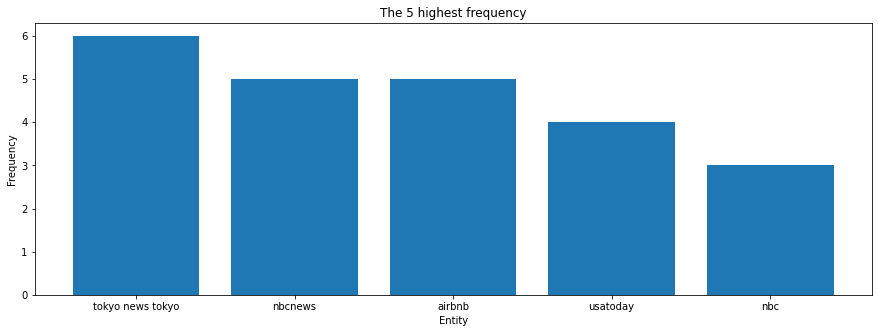

In [ ]:
# Remove the words which are common in every text.
org_meaningless_words = ['international olympic committee', 'tokyoolympics']
ORG_data_filtered = ORG_data
for w in org_meaningless_words:
  if w in ORG_data_filtered:
    del ORG_data_filtered[w]

# Plot the bar chart of ORG (Companies, agencies, institutions, etc) type.
plot_bar_chart(ORG_data)

###Research Question 6
Have people been discussing some sports while talking about Tokyo Olympics?

In [ ]:
from spacyEntityLinker import EntityLinker
from spacy.language import Language
# build a pipeline include entity linker
nlp = spacy.load('en_core_web_trf')

@Language.factory(
   "entityLinker"
)

def create_linker(nlp, name):
    return EntityLinker()

# use entity linker to get 1000 sub-entities of "type of sport" 
nlp.add_pipe('entityLinker')
doc = nlp('basketball')
all_linked_entities = doc._.linkedEntities
for ne in all_linked_entities:
    labelss = ne.get_super_entities()
    for l in labelss:
        if l.get_label() == "type of sport":
            sports = l.get_sub_entities(limit=1000)

# use these sub-entities to build patterns for ruler
patterns = []
for sport in sports:
    patterns.append({"label": "SPORT", "pattern": str(sport)})

In [ ]:
# create an entity ruler to recognize sports
nlp = spacy.load('en_core_web_trf')
ruler = nlp.add_pipe("entity_ruler")
ruler.add_patterns(patterns)

In [ ]:
# recognize and collect sport entities
SPORT_data = []

for tweet_text in unique_tweets_random:
    doc = nlp(tweet_text)
    for ne in doc.ents:
        if ne.label_ == "SPORT":
            SPORT_data.append(tweet_text[ne.start_char:ne.end_char])
            break

**Proportion of the most discussed sports.**

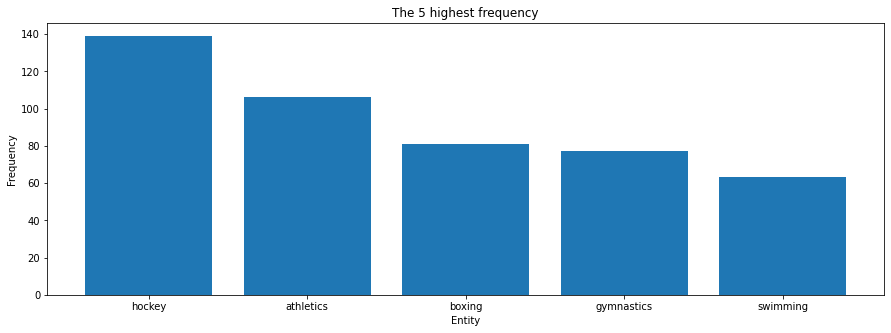

In [ ]:
# show the most popular sports
SPORT_data = Counter(SPORT_data)
plot_bar_chart(SPORT_data)

## Named Entity Linking
Based on spaCy Entity Linker.

### Research Question 7
If people have been discussing some sports, what are these sports.

In [ ]:
# add entity linker
nlp.add_pipe('entityLinker')

In [ ]:
# print linked sport entities
for tweet_text in unique_tweets_random:
    doc = nlp(tweet_text)
    all_linked_entities = doc._.linkedEntities
    for ne in all_linked_entities:
        labelss = ne.get_super_entities()
        for l in labelss:
            # show sport entities only
            if l.get_label() == 'type of sport':
                ne.pretty_print()
                break

https://www.wikidata.org/wiki/Q542        542        athletics                       collection of sports which involve running, jumping, throwing, and walking                          
https://www.wikidata.org/wiki/Q108429     108429     archery                         art, sport, practice or skill of using a bow to shoot arrows                                        
https://www.wikidata.org/wiki/Q32112      32112      boxing                          combat sport                                                                                        
https://www.wikidata.org/wiki/Q131359     131359     professional wrestling          entertainment form that mimics contact sports                                                       
https://www.wikidata.org/wiki/Q2736       2736       association football            team field sport with the objective to score points by shooting a ball into the goal frame of the op
https://www.wikidata.org/wiki/Q171038     171038     softball         